In [1]:
import numpy as np
import xarray as xr
import pandas as pd

import dask
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:107: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


### Load datasets

In [2]:
budgFw = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_fw.nc').budg_fw
budgH = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_heat.nc').budg_heat

In [3]:
budgFw = budgFw.sel(time=slice('1993-01-01','2015-12-31'))
budgH = budgH.sel(time=slice('1993-01-01','2015-12-31'))

In [4]:
dif_ConvFw = budgFw.sel(term='tendFw')[:,:-1] - budgFw.sel(term='totalFw')[:,:-1]

### Seasonal anomalies

In [5]:
budgH_anom = budgH.groupby('time.month') - budgH.groupby('time.month').mean('time')
budgFw_anom = budgFw.groupby('time.month') - budgFw.groupby('time.month').mean('time')
dif_ConvFw_anom = dif_ConvFw.groupby('time.month') - dif_ConvFw.groupby('time.month').mean('time')

In [6]:
budgH_anom = budgH_anom[:,:,:-1]
budgFw_anom = budgFw_anom[:,:,:-1]
dif_ConvFw_anom = dif_ConvFw_anom[:,:-1]

### Plot

In [7]:
class OffsetYearLocator(dates.YearLocator):
    def __init__(self, *args, **kwargs):
        self.offset = kwargs.pop("offset", 0)
        dates.YearLocator.__init__(self,*args, **kwargs)
    def tick_values(self, vmin, vmax):
        ymin = self.base.le(vmin.year) * self.base.step - self.offset
        ymax = self.base.ge(vmax.year) * self.base.step + (self.base.step-self.offset)
        ticks = [vmin.replace(year=ymin, **self.replaced)]
        while True:
            dt = ticks[-1]
            if dt.year >= ymax:
                return dates.date2num(ticks)
            year = dt.year + self.base.step
            ticks.append(dt.replace(year=year, **self.replaced))

def format_xaxis(ax):

    years = dates.YearLocator(10,month=1,day=1)
    years1=OffsetYearLocator(2,month=1,day=1, offset=1)
    dfmt = dates.DateFormatter('%Y')
    dfmt1 = dates.DateFormatter('%y')

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_minor_locator(years1)
    ax.xaxis.set_major_formatter(dfmt)
    ax.xaxis.set_minor_formatter(dfmt1)
    ax.get_xaxis().set_tick_params(which='major', pad=15)

    plt.setp(ax.get_xmajorticklabels(), rotation=0, weight="bold", ha="center")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


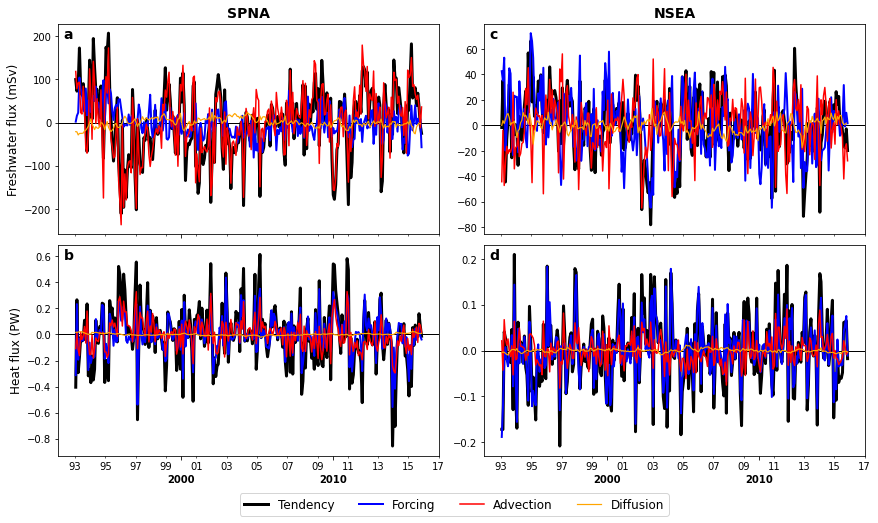

In [8]:
fig, axs = plt.subplots(2, 2,sharex=True, figsize=(14, 8))

axs[0,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,0].plot(budgFw_anom.time, budgFw_anom.sel(region='spna',term='tendFw')*1e3, 
              lw=3, color='black',label='Tendency')
axs[0,0].plot(budgFw_anom.time, budgFw_anom.sel(region='spna',term='forcFw')*1e3, 
              lw=2, color='blue',label='Forcing')
axs[0,0].plot(budgFw_anom.time, budgFw_anom.sel(region='spna',term='adv_ConvFw')*1e3, 
              lw=1.5, color='red',label='Advection')
axs[0,0].plot(dif_ConvFw_anom.time, dif_ConvFw_anom.sel(region='spna')*1e3, lw=1.2, color='orange',label='Diffusion')
axs[0,0].set_ylabel(r'Freshwater flux (mSv)',fontsize=12)
axs[0,0].text(0.013,0.93, 'a', fontsize=14, fontweight='bold', transform=axs[0,0].transAxes)
axs[0,0].set_title(r'SPNA', fontsize=14, fontweight='bold')

axs[1,0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,0].plot(budgH_anom.time, budgH_anom.sel(region='spna',term='tendH')*1e-15, 
              lw=3, color='black',label='Tendency')
axs[1,0].plot(budgH_anom.time, budgH_anom.sel(region='spna',term='forcH')*1e-15, 
              lw=2, color='blue',label='Forcing')
axs[1,0].plot(budgH_anom.time, budgH_anom.sel(region='spna',term='adv_ConvH')*1e-15, 
              lw=1.5, color='red',label='Advection')
axs[1,0].plot(budgH_anom.time, budgH_anom.sel(region='spna',term='dif_ConvH')*1e-15, 
              lw=1.2, color='orange',label='Diffusion')
axs[1,0].set_ylabel(r'Heat flux (PW)', fontsize=12)
axs[1,0].text(0.013,0.93, 'b', fontsize=14, fontweight='bold', transform=axs[1,0].transAxes)
format_xaxis(axs[1,0])

axs[0,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0,1].plot(budgFw_anom.time, budgFw_anom.sel(region='nsea',term='tendFw')*1e3, 
              lw=3, color='black',label='Tendency')
axs[0,1].plot(budgFw_anom.time, budgFw_anom.sel(region='nsea',term='forcFw')*1e3, 
              lw=2, color='blue',label='Forcing')
axs[0,1].plot(budgFw_anom.time, budgFw_anom.sel(region='nsea',term='adv_ConvFw')*1e3, 
              lw=1.5, color='red',label='Advection')
axs[0,1].plot(dif_ConvFw_anom.time, dif_ConvFw_anom.sel(region='nsea')*1e3, 
              lw=1.2, color='orange',label='Diffusion')
axs[0,1].text(0.013,0.93, 'c', fontsize=14, fontweight='bold', transform=axs[0,1].transAxes)
axs[0,1].set_title(r'NSEA', fontsize=14, fontweight='bold')

axs[1,1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1,1].plot(budgH_anom.time, budgH_anom.sel(region='nsea',term='tendH')*1e-15, 
              lw=3, color='black',label='Tendency')
axs[1,1].plot(budgH_anom.time, budgH_anom.sel(region='nsea',term='forcH')*1e-15, 
              lw=2, color='blue',label='Forcing')
axs[1,1].plot(budgH_anom.time, budgH_anom.sel(region='nsea',term='adv_ConvH')*1e-15, 
              lw=1.5, color='red',label='Advection')
axs[1,1].plot(budgH_anom.time, budgH_anom.sel(region='nsea',term='dif_ConvH')*1e-15, 
              lw=1.2, color='orange',label='Diffusion')
axs[1,1].text(0.013,0.93, 'd', fontsize=14, fontweight='bold', transform=axs[1,1].transAxes)
format_xaxis(axs[1,1])
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, hspace=0.05, wspace=0.12)
axs[1,1].legend(frameon=True, fancybox=True, bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=12)

#plt.savefig('/mnt/efs/figure.png')
plt.savefig('/mnt/efs/figure.eps')
#plt.savefig('/mnt/efs/figure.pdf')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


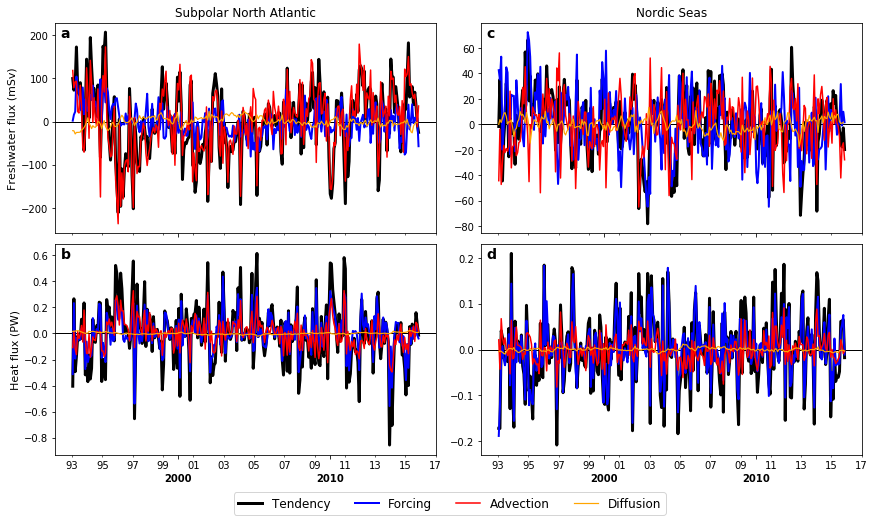

### Total area (SPNA+NSEA)

In [5]:
budgH = budgH.sel(region=['spna','nsea']).sum('region')
budgFw = budgFw.sel(region=['spna','nsea']).sum('region')
dif_ConvFw = dif_ConvFw.sel(region=['spna','nsea']).sum('region')

In [6]:
budgH_anom = budgH.groupby('time.month') - budgH.groupby('time.month').mean('time')
budgFw_anom = budgFw.groupby('time.month') - budgFw.groupby('time.month').mean('time')
dif_ConvFw_anom = dif_ConvFw.groupby('time.month') - dif_ConvFw.groupby('time.month').mean('time')

In [8]:
budgH_anom = budgH_anom[:,:-1]
budgFw_anom = budgFw_anom[:,:-1]
dif_ConvFw_anom = dif_ConvFw_anom[:-1]

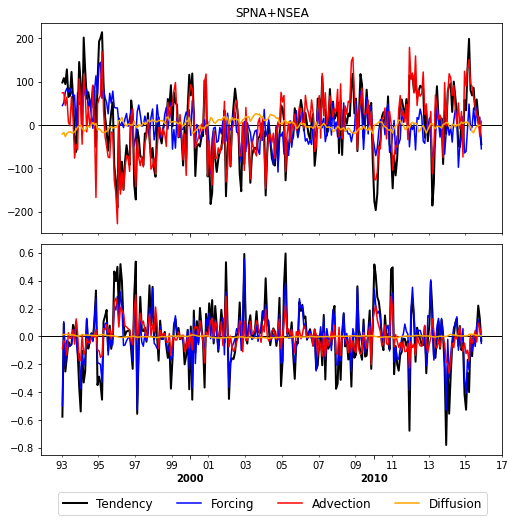

In [12]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 8))

axs[0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0].plot(budgFw_anom.time, budgFw_anom.sel(term='tendFw')*1e3, lw=2, color='black',label='Tendency')
axs[0].plot(budgFw_anom.time, budgFw_anom.sel(term='forcFw')*1e3, lw=1.5, color='blue',label='Forcing')
axs[0].plot(budgFw_anom.time, budgFw_anom.sel(term='adv_ConvFw')*1e3, lw=1.5, color='red',label='Advection')
axs[0].plot(dif_ConvFw_anom.time, dif_ConvFw_anom*1e3, lw=1.5, color='orange',label='Diffusion')
axs[0].set_title(r'SPNA+NSEA', fontsize=12)

axs[1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1].plot(budgH_anom.time, budgH_anom.sel(term='tendH')*1e-15, lw=2, color='black',label='Tendency')
axs[1].plot(budgH_anom.time, budgH_anom.sel(term='forcH')*1e-15, lw=1.5, color='blue',label='Forcing')
axs[1].plot(budgH_anom.time, budgH_anom.sel(term='adv_ConvH')*1e-15, lw=1.5, color='red',label='Advection')
axs[1].plot(budgH_anom.time, budgH_anom.sel(term='dif_ConvH')*1e-15, lw=1.5, color='orange',label='Diffusion')
format_xaxis(axs[1])
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, hspace=0.05, wspace=0.12)
axs[1].legend(frameon=True, fancybox=True, bbox_to_anchor=(0.98, -0.15), ncol=4, fontsize=12)

#plt.savefig('/mnt/efs/figure.png')
#plt.savefig('/mnt/efs/figure.eps')
#plt.savefig('/mnt/efs/figure.pdf')
plt.show()

### Covariance ratio

In [13]:
ecco = xr.open_zarr('/mnt/efs/data/ecco/zarr/eccov4r3_output/')

In [14]:
def convert_to_df(arr,region,terms):
    
    # Load time series to dataframe
    df = arr.sel(region=region, term=terms).reset_coords(drop=True).to_dataframe()
    
    # Unstack
    df = df.unstack(level='term').reset_index()
    
    # Convert MultiIndex to Index
    df.columns = df.columns.map(''.join)
    
    # Set time as index
    df.set_index('time',inplace=True)
    
    # Rename columns
    df.rename(columns = lambda x : str(x)[7:],inplace=True)
    #df.rename(columns = lambda x : str(x)[9:],inplace=True)

    return df

In [36]:
#df = convert_to_df(budgFw_anom,'spna',['tendFw','forcFw','ConvFw','totalFw'])
#df = convert_to_df(budgFw_anom,'nsea',['tendFw','forcFw','ConvFw','totalFw'])
#df = convert_to_df(budgH_anom,'spna',['tendH','forcH','adv_ConvH','dif_ConvH'])
df = convert_to_df(budgH_anom,'nsea',['tendH','forcH','adv_ConvH','dif_ConvH'])

#df['res'] = df.tendFw - df.totalFw
df['dt'] = ecco.reset_coords().dt.sel(time=slice('1993-01-01','2015-12-31')).to_dataframe().dt

In [37]:
# Annual
df_sub = df.loc[(df.index > '1992-12-31')&(df.index < '2015-01-01')]
df_1yr = df_sub.multiply(df_sub["dt"], axis="index").resample('1A',kind='period').sum().drop(columns=['dt'])

In [38]:
# Pentad
df_sub = df.loc[(df.index > '1994-12-31')&(df.index < '2015-01-01')]
df_5yr = df_sub.multiply(df_sub["dt"], axis="index").resample('5A',kind='period').mean().drop(columns=['dt'])

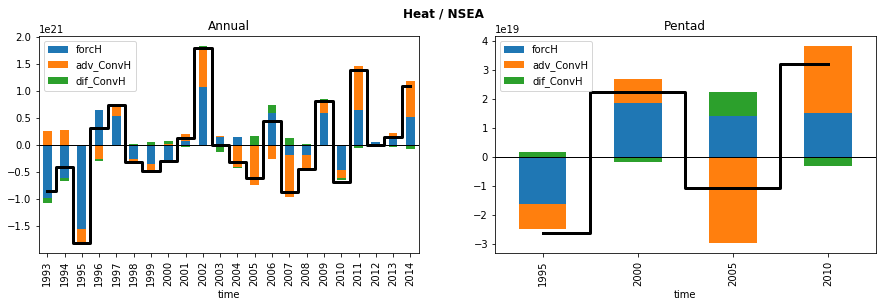

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

#df_1yr[['forcFw','ConvFw','res']].plot.bar(stacked=True,ax=axs[0])
df_1yr[['forcH','adv_ConvH','dif_ConvH']].plot.bar(stacked=True,ax=axs[0])
#axs[0].step(df_1yr.index.strftime('%Y'), df_1yr.tendFw, where='mid', c='k', lw=3, linestyle='-')
axs[0].step(df_1yr.index.strftime('%Y'), df_1yr.tendH, where='mid', c='k', lw=3, linestyle='-')
axs[0].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[0].set_title('Annual')

#df_5yr[['forcFw','ConvFw','res']].plot.bar(stacked=True,ax=axs[1])
df_5yr[['forcH','adv_ConvH','dif_ConvH']].plot.bar(stacked=True,ax=axs[1])
#axs[1].step(df_5yr.index.strftime('%Y'), df_5yr.tendFw, where='mid', c='k', lw=3, linestyle='-')
axs[1].step(df_5yr.index.strftime('%Y'), df_5yr.tendH, where='mid', c='k', lw=3, linestyle='-')
axs[1].axhline(y=0, xmin=0, xmax=1, linewidth=1.0, color = 'k')
axs[1].set_title('Pentad')

#fig.suptitle('Freshwater / SPNA',fontweight='bold')
#fig.suptitle('Freshwater / NSEA',fontweight='bold')
#fig.suptitle('Heat / SPNA',fontweight='bold')
fig.suptitle('Heat / NSEA',fontweight='bold')

plt.show()

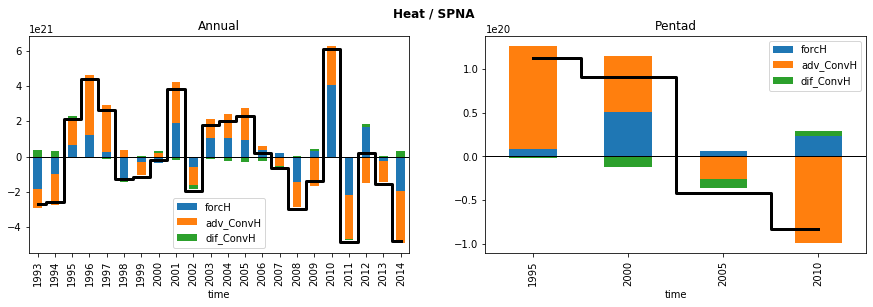

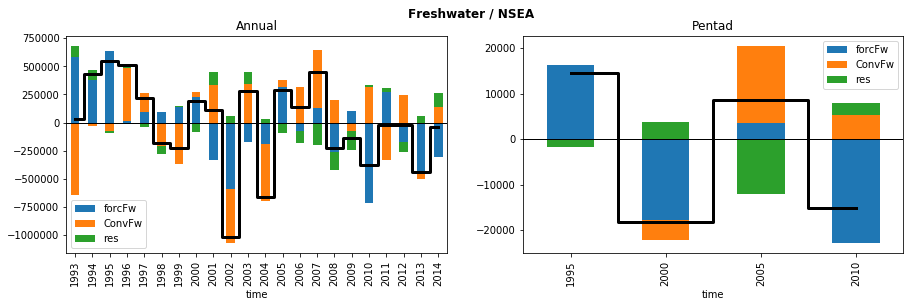

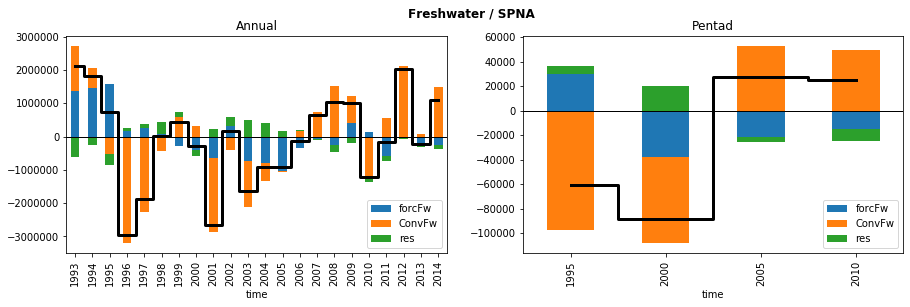

In [12]:
def cov_ratio(df,y):
    return pd.Series({term: df[y].cov(df[term]) for term in df if term != y})/np.var(df[y],ddof=1)

### Freshwater

Freshwater / SPNA
          monthly    annual    pentad
ConvFw   0.880479  0.870442  1.255324
forcFw   0.157787  0.244330 -0.048130
totalFw  1.038266  1.114773  1.207194
res     -0.038266 -0.114773 -0.207194


In [14]:
dfFw_spna.drop(index='totalFw',inplace=True)
dfFw_spna.rename(index={'ConvFw': 'Advection','res': 'Diffusion','forcFw': 'Forcing'},inplace=True)
dfFw_spna = dfFw_spna.reindex(['Forcing', 'Advection', 'Diffusion'])
dfFw_spna.columns=pd.MultiIndex.from_tuples([('SPNA','monthly'),('SPNA','annual'),('SPNA','pentad')])

In [19]:
corr1mo = cov_ratio(df.drop(columns=['dt']),'tendFw').to_frame(name='monthly')
corr1yr = cov_ratio(df_1yr,'tendFw').to_frame(name='annual')
corr5yr = cov_ratio(df_5yr,'tendFw').to_frame(name='pentad')

#print('Freshwater / SPNA')
print('Freshwater / NSEA')
#dfFw_spna = corr1mo.join(corr1yr.join(corr5yr))
#print(dfFw_spna)
dfFw_nsea = corr1mo.join(corr1yr.join(corr5yr))
print(dfFw_nsea)

Freshwater / NSEA
          monthly    annual    pentad
ConvFw   0.436282  0.455811  0.227294
forcFw   0.578527  0.580365  1.077277
totalFw  1.014809  1.036177  1.304570
res     -0.014809 -0.036177 -0.304570


In [15]:
dfFw_spna

SPNA                    
            monthly    annual    pentad
Forcing    0.157787  0.244330 -0.048130
Advection  0.880479  0.870442  1.255324
Diffusion -0.038266 -0.114773 -0.207194

In [20]:
dfFw_nsea.drop(index='totalFw',inplace=True)
dfFw_nsea.rename(index={'ConvFw': 'Advection','res': 'Diffusion','forcFw': 'Forcing'},inplace=True)
dfFw_nsea = dfFw_nsea.reindex(['Forcing', 'Advection', 'Diffusion'])
dfFw_nsea.columns=pd.MultiIndex.from_tuples([('NSEA','monthly'),('NSEA','annual'),('NSEA','pentad')])

In [21]:
dfFw_nsea

NSEA                    
            monthly    annual    pentad
Forcing    0.578527  0.580365  1.077277
Advection  0.436282  0.455811  0.227294
Diffusion -0.014809 -0.036177 -0.304570

In [23]:
dfFw = dfFw_spna.join(dfFw_nsea)
dfFw.columns=pd.MultiIndex.from_tuples([('Freshwater','SPNA','monthly'),('Freshwater','SPNA','annual'),
                                        ('Freshwater','SPNA','pentad'),('Freshwater','NSEA','monthly'),
                                        ('Freshwater','NSEA','annual'),('Freshwater','NSEA','pentad')])

In [28]:
dfFw

Freshwater                                                  
                SPNA                          NSEA                    
             monthly    annual    pentad   monthly    annual    pentad
Forcing     0.157787  0.244330 -0.048130  0.578527  0.580365  1.077277
Advection   0.880479  0.870442  1.255324  0.436282  0.455811  0.227294
Diffusion  -0.038266 -0.114773 -0.207194 -0.014809 -0.036177 -0.304570

### Heat

Heat / SPNA
            monthly    annual    pentad
adv_ConvH  0.412714  0.572986  0.976724
dif_ConvH -0.005463 -0.033340 -0.036626
forcH      0.589383  0.460354  0.059902


In [34]:
dfH_spna.rename(index={'adv_ConvH': 'Advection','dif_ConvH': 'Diffusion','forcH': 'Forcing'},inplace=True)
dfH_spna = dfH_spna.reindex(['Forcing', 'Advection', 'Diffusion'])
dfH_spna.columns=pd.MultiIndex.from_tuples([('SPNA','monthly'),('SPNA','annual'),('SPNA','pentad')])

In [35]:
dfH_spna

SPNA                    
            monthly    annual    pentad
Forcing    0.589383  0.460354  0.059902
Advection  0.412714  0.572986  0.976724
Diffusion -0.005463 -0.033340 -0.036626

In [39]:
corr1mo = cov_ratio(df.drop(columns=['dt']),'tendH').to_frame(name='monthly')
corr1yr = cov_ratio(df_1yr,'tendH').to_frame(name='annual')
corr5yr = cov_ratio(df_5yr,'tendH').to_frame(name='pentad')

#print('Heat / SPNA')
print('Heat / NSEA')
#dfH_spna = corr1mo.join(corr1yr.join(corr5yr))
#print(dfH_spna)
dfH_nsea = corr1mo.join(corr1yr.join(corr5yr))
print(dfH_nsea)

Heat / NSEA
            monthly    annual    pentad
adv_ConvH  0.261284  0.344871  0.668278
dif_ConvH  0.000593 -0.007753 -0.130568
forcH      0.736035  0.662882  0.462290


In [40]:
dfH_nsea.rename(index={'adv_ConvH': 'Advection','dif_ConvH': 'Diffusion','forcH': 'Forcing'},inplace=True)
dfH_nsea = dfH_nsea.reindex(['Forcing', 'Advection', 'Diffusion'])
dfH_nsea.columns=pd.MultiIndex.from_tuples([('NSEA','monthly'),('NSEA','annual'),('NSEA','pentad')])

In [41]:
dfH_nsea

NSEA                    
            monthly    annual    pentad
Forcing    0.736035  0.662882  0.462290
Advection  0.261284  0.344871  0.668278
Diffusion  0.000593 -0.007753 -0.130568

In [42]:
dfH = dfH_spna.join(dfH_nsea)
dfH.columns=pd.MultiIndex.from_tuples([('Heat','SPNA','monthly'),('Heat','SPNA','annual'),
                                       ('Heat','SPNA','pentad'),('Heat','NSEA','monthly'),
                                       ('Heat','NSEA','annual'),('Heat','NSEA','pentad')])

In [44]:
df = dfFw.join(dfH)

In [45]:
df

Freshwater                                                    \
                SPNA                          NSEA                       
             monthly    annual    pentad   monthly    annual    pentad   
Forcing     0.157787  0.244330 -0.048130  0.578527  0.580365  1.077277   
Advection   0.880479  0.870442  1.255324  0.436282  0.455811  0.227294   
Diffusion  -0.038266 -0.114773 -0.207194 -0.014809 -0.036177 -0.304570   

               Heat                                                    
               SPNA                          NSEA                      
            monthly    annual    pentad   monthly    annual    pentad  
Forcing    0.589383  0.460354  0.059902  0.736035  0.662882  0.462290  
Advection  0.412714  0.572986  0.976724  0.261284  0.344871  0.668278  
Diffusion -0.005463 -0.033340 -0.036626  0.000593 -0.007753 -0.130568

In [48]:
df.to_excel('/mnt/efs/table.xlsx')

In [47]:
from openpyxl import Workbook